## Data check
Deriving insights for cleaning, preprocessing and mining

In [1]:
import pandas

%matplotlib inline
from matplotlib import pyplot as plot

In [2]:
def percentify(count, total):
    return '{} ({}%)'.format(count, round(100 * count / total, 1))

In [3]:
orders = pandas.read_csv('data/orders.csv.gz', parse_dates=[ 'order_date' ])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6051891 entries, 0 to 6051890
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   order_date  datetime64[ns]
 1   org         int64         
 2   order_id    int64         
 3   material    int64         
 4   inv_qty     float64       
 5   rev         float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 277.0 MB


In [4]:
print('Date range:', orders.order_date.min(), '-', orders.order_date.max())

Date range: 2019-08-01 00:00:00 - 2020-01-31 00:00:00


In [5]:
orders_monthly_distribution = orders.order_date.transform(lambda d: '{}-{:02}'.format(d.year, d.month)).value_counts()

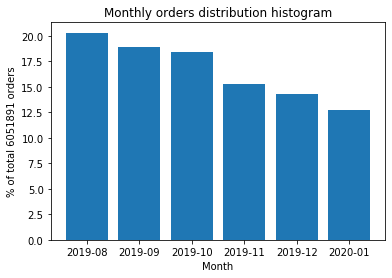

In [6]:
plot.bar(orders_monthly_distribution.keys(), (100 * orders_monthly_distribution.values / len(orders)).round(1))
plot.title('Monthly orders distribution histogram')
plot.xlabel('Month')
plot.ylabel('% of total {} orders'.format(len(orders)))
plot.show()

In [7]:
print('Unique organizations:', len(orders.org.value_counts()))
print('Unique orders:', percentify(len(orders.order_id.value_counts()), len(orders)))
print('Unique materials:', percentify(len(orders.material.value_counts()), len(orders)))

Unique organizations: 5
Unique orders: 2316482 (38.3%)
Unique materials: 21428 (0.4%)


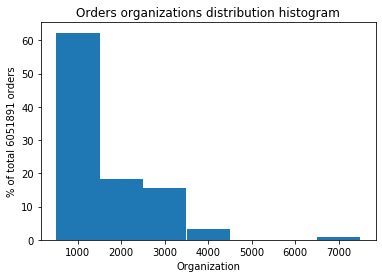

In [8]:
orders_organization_distribution = orders.org.value_counts()

plot.bar(orders_organization_distribution.keys(), (100 * orders_organization_distribution.values / len(orders)).round(1), width=10e2)
plot.title('Orders organizations distribution histogram')
plot.xlabel('Organization')
plot.ylabel('% of total {} orders'.format(len(orders)))
plot.show()

In [9]:
print('Non-positive quantity:', len(orders[orders.inv_qty <= 0]))
print('Negative revenue:', len(orders[orders.rev < 0]))
print('Negative revenue and non-positive quantity orders:', len(orders[(orders.inv_qty <= 0) | (orders.rev < 0)]))
print('Total nans count:', sum(len(orders) - orders.count()))

Non-positive quantity: 333
Negative revenue: 228
Negative revenue and non-positive quantity orders: 333
Total nans count: 0


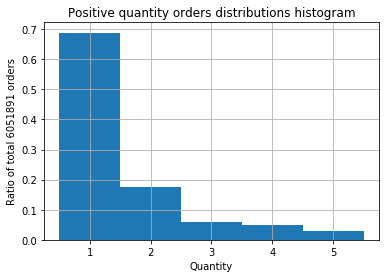

In [10]:
orders[orders.inv_qty > 0].inv_qty.hist(bins=[ (x - .5) for x in range(1, 7) ], density=True)
plot.title('Positive quantity orders distributions histogram')
plot.xlabel('Quantity')
plot.ylabel('Ratio of total {} orders'.format(len(orders)))
plot.show()

In [11]:
orders_multi_dated = orders[['order_id', 'order_date']].groupby('order_id').filter(lambda group: len(set(group.order_date)) > 1)

print('Orders with multiple dates:', percentify(len(orders_multi_dated), len(orders)))

Orders with multiple dates: 190082 (3.1%)


In [12]:
orders_multi_dated = orders_multi_dated.groupby('order_id')
orders_multi_dated_max_delta = (orders_multi_dated.order_date.max() - orders_multi_dated.order_date.min()).max()

print('Unique orders with multiple dates:', percentify(len(orders_multi_dated), len(set(orders.order_id))))
print('Maximum multiple dates orders days span:', orders_multi_dated_max_delta.days)

Unique orders with multiple dates: 25353 (1.1%)
Maximum multiple dates orders days span: 98


In [13]:
orders_multi_organizations = orders[['order_id', 'org']].groupby('order_id').filter(lambda group: len(set(group.org)) > 1)

print('Orders with multiple organizations:', len(set(orders_multi_organizations.order_id)))

Orders with multiple organizations: 0


## Conclusions

- Orders have some seasonality, time analysis might be required
- There are some wierd non-positive quantity orders, they are considered anomalies and excluded so far
- There are some orders with multiple days span, but they are rare (~3.1%) and can be discarded so far